In [3]:
import pandas as pd

## Датасет

Датасет содержит в себе информацию об академической успеваимости школьников, их учебных достижениях. На основе этих параметров был расчитан шанс на поступление в один из пяти университетов. В датасете 8 колонов и 500 строк

In [19]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df.shape

(500, 9)

In [21]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [23]:
df.drop('Serial No.', axis = 1, inplace = True)

In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

С помощью задач машинного обучения мы сможем предсказать шансы на поступление при заданных академических достижениях

## Линейная регрессия

Многие алгоритмы машинного обучения работают лучше, когда параметры имеют относительно одинаковый масштаб. Воспользуемся методом MinMaxScaler.Для каждого значения в объекте MinMaxScaler вычитает минимальное значение в объекте и затем делит на диапазон. Диапазон - это разница между исходным максимумом и исходным минимумом.

In [25]:
from sklearn.preprocessing import MinMaxScaler 

In [26]:
scaler= MinMaxScaler()

In [27]:
num_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
        'Chance of Admit ']

df[num_vars] = scaler.fit_transform(df[num_vars])

Датасет с нормализованными данными

In [28]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.492063


In [29]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Зависимым параметром будут данные из колонки 'Chance of Admit', а независимыми параметрами станут оставшиеся колонки (так как именно они влияют на шансы на поступление).

In [30]:
df_y=df['Chance of Admit ']
df.drop('Chance of Admit ', axis=1,inplace=True)

Разделим датасет на обучающий и тестовый

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.3,random_state=80) 

In [40]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

Коэффициент детерминации указывает насколько тесной является связь между факторами регрессии и зависимой переменной. В нашем случае модель объясняет вариацию зависимой модели на  83%.

In [41]:
print('R Squared: {:.2f}'.format(reg.score(X_test, y_test)*100)) 

R Squared: 83.35


 Построим график, который показывается насколько сильно каждый из параметров влияет на зависмую переменную.

[0.16317999 0.1403648  0.01627883 0.01105758 0.10073275 0.56493183
 0.04130361]


<AxesSubplot:title={'center':'Importance of Features'}>

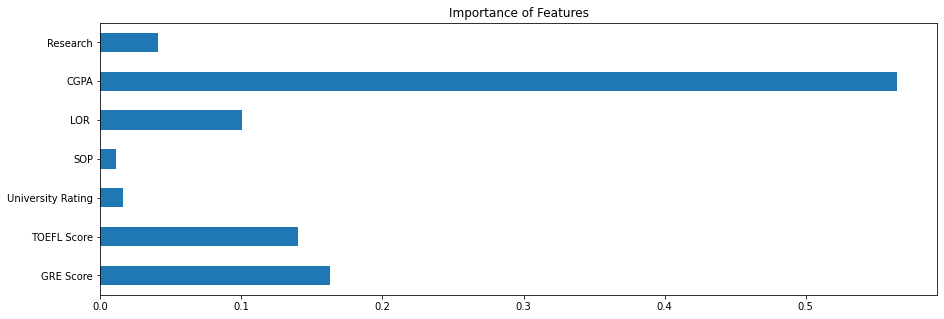

In [42]:
print(reg.coef_)
importance=reg.coef_
importance=pd.Series(reg.coef_,index =['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'])
importance.plot(kind='barh',title='Importance of Features',figsize=(15,5))

In [43]:
list(zip(X_train.columns, reg.coef_))

[('GRE Score', 0.1631799882305994),
 ('TOEFL Score', 0.14036479872256036),
 ('University Rating', 0.01627882620493304),
 ('SOP', 0.011057579438418494),
 ('LOR ', 0.1007327521520627),
 ('CGPA', 0.5649318319224101),
 ('Research', 0.041303613914438986)]

#### По графику видно, что наибольшое влияение на поступление имеют: CGPA (средний балл аттестата), GRE  Score и TOEFL Score

c:\users\redic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


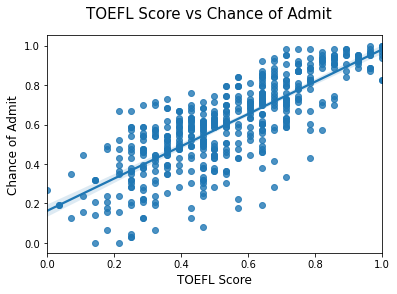

c:\users\redic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


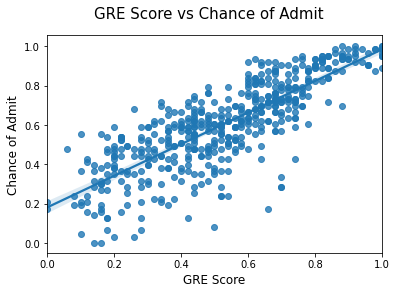

c:\users\redic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


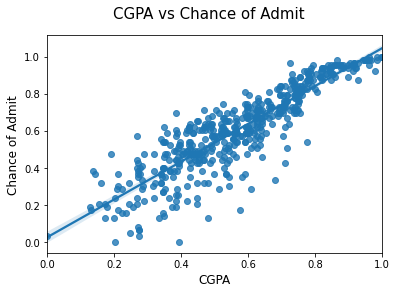

In [76]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
list_of_pam = ['TOEFL Score', 'GRE Score', 'CGPA']
def graf(string):
    fig = plt.figure()
    sns.regplot(df[string], df_y)
    fig.suptitle(string + ' vs Chance of Admit', fontsize = 15)              # Plot heading 
    plt.xlabel(string, fontsize = 12)                          # X-label
    plt.ylabel('Chance of Admit', fontsize = 12) 
    plt.show()
for i in list_of_pam:
    graf(i)

#### Графики выше доказывают, что между этими тремя параметрами и 'Chance of Admit' есть линейная зависимость

## Логистическая регрессия

Логистическая регрессия это статистический метод для анализа набора данных, в котором есть одна или несколько независимых переменных, которые определяют результат. Результат измеряется с помощью дихотомической переменной (в которой есть только два возможных результата).

In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression

Так как возможных вариантов должно быть только два, то введем колонку 'Probability of Acceptance', которая принимает значения 0 и 1. Если шансы на поступление у абитуриента выше медианного, то значение равно 1, а если меньше, то 0

In [47]:
df_y.median()

0.6031746031746031

In [48]:
targets = np.where(df_y>= df_y.median(), 1, 0)
targets.shape

(500,)

In [49]:
df['Probability of Acceptance'] = targets
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability of Acceptance
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0


In [50]:
targets.sum()/len(targets)

0.528

In [51]:
inputs = df.iloc[:, :-1]
inputs.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0


In [52]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=20)

Обучим модель

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

Модель дает правильный результат в 87% случаев

In [63]:
log_reg.score(x_train, y_train)

0.8771428571428571

In [64]:
log_reg.intercept_

array([-6.50426651])

In [65]:
log_reg.coef_

array([[2.72488349, 2.01526692, 0.82233502, 1.68993416, 1.37214214,
        2.58811911, 0.98359133]])

In [66]:
log_reg.score(x_test, y_test)

0.8733333333333333

Построим график значимости каждого из независимых параметров

[[2.72488349 2.01526692 0.82233502 1.68993416 1.37214214 2.58811911
  0.98359133]]


<AxesSubplot:title={'center':'Importance of Features'}>

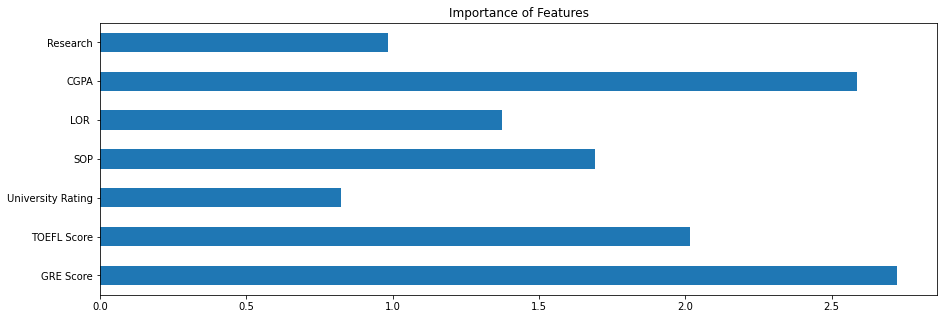

In [58]:
print(log_reg.coef_)
importance=log_reg.coef_
importance=pd.Series(log_reg.coef_[0],index =['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'])
importance.plot(kind='barh',title='Importance of Features',figsize=(15,5))

#### Видно, что тройка наиболее 'влиятельных' параметров не изменилось, однако в данной модели GRE Score имеет чуть больше значения чем показатель CGPA

## Метод ближайших соседей (kNN)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy()[:,1:-1], df['Probability of Acceptance'].to_numpy(), test_size=0.7,random_state=20) 

Выбираем различное количество соседей, чтобы сравнить результаты

In [80]:
kNN_1 = KNeighborsClassifier(n_neighbors=1)
kNN_2 = KNeighborsClassifier(n_neighbors=2)
kNN_3 = KNeighborsClassifier(n_neighbors=3)
kNN_4 = KNeighborsClassifier(n_neighbors=4)
kNN_5 = KNeighborsClassifier(n_neighbors=5)

In [81]:
kNN_1.fit(X_train, y_train)
print(classification_report(y_test, kNN_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       175
           1       0.76      0.86      0.80       175

    accuracy                           0.79       350
   macro avg       0.80      0.79      0.79       350
weighted avg       0.80      0.79      0.79       350



In [82]:
kNN_2.fit(X_train, y_train)
print(classification_report(y_test, kNN_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       175
           1       0.83      0.77      0.80       175

    accuracy                           0.81       350
   macro avg       0.81      0.81      0.81       350
weighted avg       0.81      0.81      0.81       350



In [83]:
kNN_3.fit(X_train, y_train)
print(classification_report(y_test, kNN_3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       175
           1       0.78      0.91      0.84       175

    accuracy                           0.83       350
   macro avg       0.83      0.83      0.82       350
weighted avg       0.83      0.83      0.82       350



In [84]:
kNN_4.fit(X_train, y_train)
print(classification_report(y_test, kNN_4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       175
           1       0.81      0.86      0.84       175

    accuracy                           0.83       350
   macro avg       0.83      0.83      0.83       350
weighted avg       0.83      0.83      0.83       350



In [85]:
kNN_5.fit(X_train, y_train)
print(classification_report(y_test, kNN_5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       175
           1       0.77      0.92      0.84       175

    accuracy                           0.83       350
   macro avg       0.84      0.83      0.82       350
weighted avg       0.84      0.83      0.82       350



#### С увеличением количества соседей увеличивается точность классификация. Для построения графика воспользуемся классификацией с kNN = 4 т.к метрики precision и recall примерно одинаково высокие, а accuracy у классификации с четырьмя и пятью соседями одинакова.

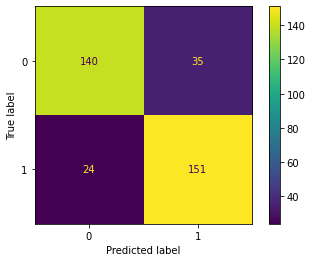

In [86]:
plot_confusion_matrix(kNN_4, X_test, y_test);

### Наивный байесовский классификатор

Наивный байесовский алгоритм – это алгоритм классификации, основанный на теореме Байеса с допущением о независимости признаков. Другими словами, НБА предполагает, что наличие какого-либо признака в классе не связано с наличием какого-либо другого признака.

In [224]:
from sklearn.naive_bayes import MultinomialNB

Классами здесь также являются значения колонки 'Probability of Accaptance'

In [260]:
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy()[:,1:-1], df['Probability of Acceptance'].to_numpy(), test_size=0.4,random_state=50) 

In [261]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [262]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        85
           1       0.81      0.83      0.82       115

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200



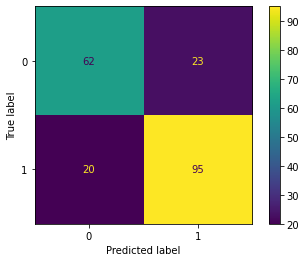

In [263]:
plot_confusion_matrix(clf, X_test, y_test);

#### Модель дает верные результаты с точностью в 79%